In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [6]:
multiple = pd.read_csv('results_multiple_seagull.csv', index_col=0)
multiple

multiple2 = pd.read_csv('results_seagull.csv', index_col=0)
combined = pd.concat([multiple, multiple2])
combined.round(3)

,model,trainc1,trainc2,testc1,testc2
0,unetfpnsum,0.998,0.645,0.998,0.653
1,unetfpn,0.998,0.674,0.998,0.679
2,unetfpnconcat,0.998,0.654,0.998,0.659
3,fcnfpn,0.998,0.526,0.997,0.529
0,fcn8s,0.965,0.023,0.964,0.031
1,unet,0.998,0.653,0.998,0.648
2,fpn,0.999,0.687,0.998,0.678


In [21]:
combined.columns = [
    "model",
    "tnbackground",
    "tnship",
    "tsbackground",
    "tsship"
]


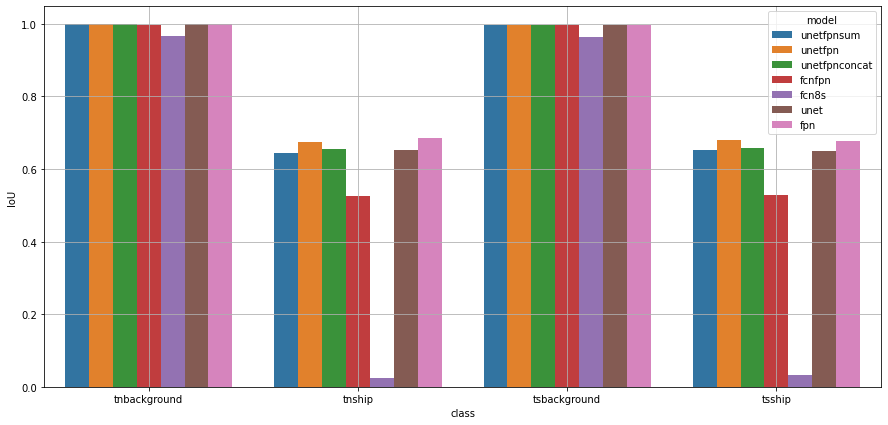

In [22]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=combined.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [9]:
combined.iloc[:,2:4]

,trainc2,testc1
0,0.644634,0.997604
1,0.674340,0.997786
2,0.654317,0.997692
3,0.526178,0.997307
0,0.022900,0.964118
1,0.652954,0.997730
2,0.686905,0.997822


In [10]:
combined.iloc[:,4:]

,testc2
0,0.653484
1,0.678891
2,0.658820
3,0.529459
0,0.031482
1,0.648498
2,0.677789


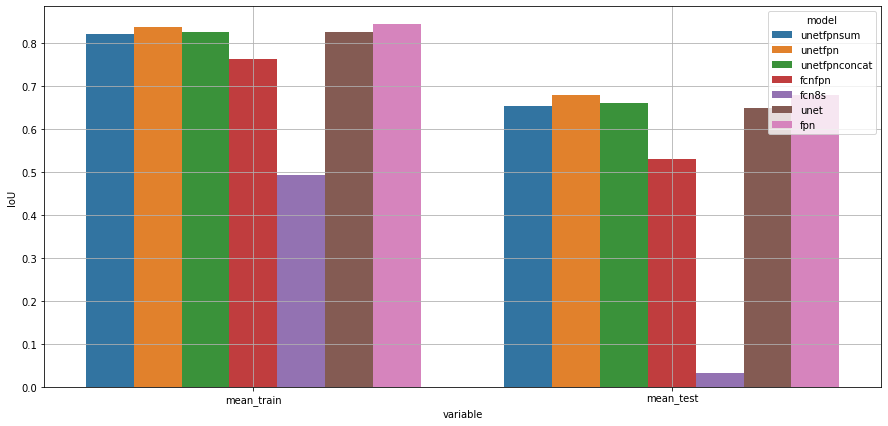

In [20]:
mean_results = combined.copy()
mean_results['mean_train'] = combined.iloc[:,2:4].mean(axis=1)
mean_results['mean_test'] = combined.iloc[:,4:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [12]:
mean_results

,mean_train,mean_test,model
0,0.821119,0.653484,unetfpnsum
1,0.836063,0.678891,unetfpn
2,0.826004,0.658820,unetfpnconcat
3,0.761742,0.529459,fcnfpn
0,0.493509,0.031482,fcn8s
1,0.825342,0.648498,unet
2,0.842364,0.677789,fpn
